In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('lsd_math_score_data.csv')

In [3]:
data

,Time_delay,Drug_ppm,Math_score
0,5,1.17,78.93
1,15,2.97,58.20
2,30,3.26,67.47
3,60,4.69,37.47
4,120,5.83,45.65
5,240,6.00,32.92
6,480,6.41,29.97


In [4]:
time=data[['Time_delay']]
lsd=data[['Drug_ppm']]
score=data[['Math_score']]

In [5]:
regr=LinearRegression()
regr.fit(lsd,score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
predicted_score=regr.predict(lsd)
predicted_score

array([[78.58279806],
       [62.36575851],
       [59.75301325],
       [46.86947628],
       [36.59868457],
       [35.06707528],
       [31.37319405]])

In [7]:
regr.intercept_

array([89.12387377])

In [8]:
regr.coef_

array([[-9.00946642]])

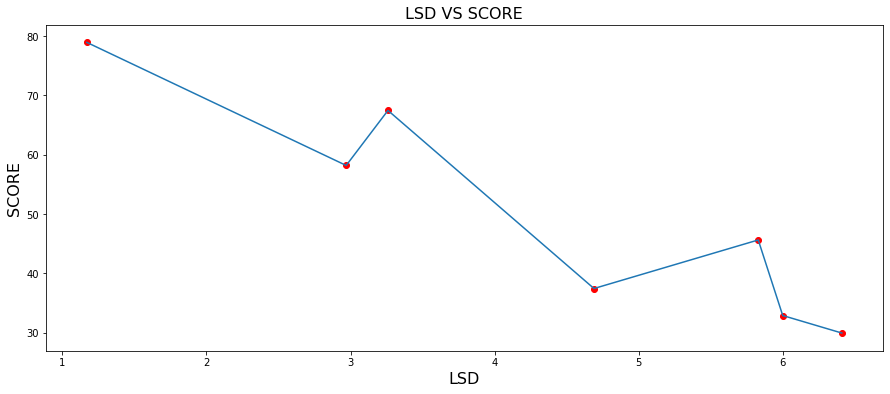

In [9]:
plt.figure(figsize=(15,6))
plt.plot(lsd,score)
plt.scatter(lsd,score,color='red')
plt.title('LSD VS SCORE',fontsize=16)
plt.xlabel('LSD',fontsize=16)
plt.ylabel('SCORE',fontsize=16)
plt.show()

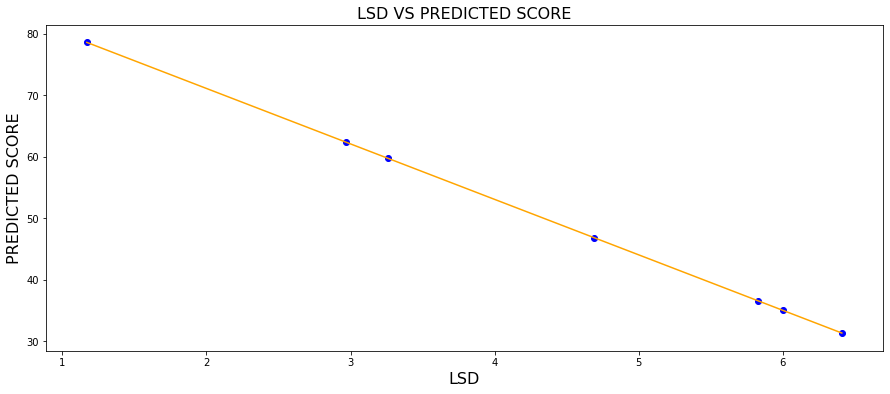

In [10]:
plt.figure(figsize=(15,6))
plt.plot(lsd,predicted_score,color='orange')
plt.scatter(lsd,predicted_score,color='blue')
plt.title('LSD VS PREDICTED SCORE',fontsize=16)
plt.xlabel('LSD',fontsize=16)
plt.ylabel('PREDICTED SCORE',fontsize=16)
plt.show()

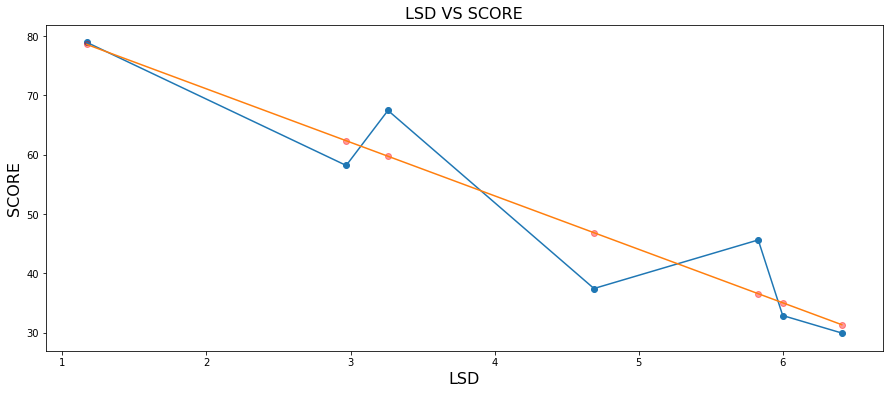

In [11]:
plt.figure(figsize=(15,6))
plt.plot(lsd,score)
plt.scatter(lsd,score)
plt.plot(lsd,predicted_score)
plt.scatter(lsd,predicted_score,color='red',alpha=0.4)
plt.title('LSD VS SCORE',fontsize=16)
plt.xlabel('LSD',fontsize=16)
plt.ylabel('SCORE',fontsize=16)
plt.show()

In [12]:
print('Intercept:', regr.intercept_)
print('Coef     :', regr.coef_)
print('Accuracy :', regr.score(lsd,score))

Intercept: [89.12387377]
Coef     : [[-9.00946642]]
Accuracy : 0.8778349707775889


In [13]:
df=score
df.insert(loc=1,column='Predicted score',value=predicted_score,allow_duplicates=True)
df

,Math_score,Predicted score
0,78.93,78.582798
1,58.20,62.365759
2,67.47,59.753013
3,37.47,46.869476
4,45.65,36.598685
5,32.92,35.067075
6,29.97,31.373194


In [14]:
df['Resudials']=df['Math_score']-df['Predicted score']

In [15]:
df

,Math_score,Predicted score,Resudials
0,78.93,78.582798,0.347202
1,58.20,62.365759,-4.165759
2,67.47,59.753013,7.716987
3,37.47,46.869476,-9.399476
4,45.65,36.598685,9.051315
5,32.92,35.067075,-2.147075
6,29.97,31.373194,-1.403194


In [16]:
df.round(2)

,Math_score,Predicted score,Resudials
0,78.93,78.58,0.35
1,58.20,62.37,-4.17
2,67.47,59.75,7.72
3,37.47,46.87,-9.40
4,45.65,36.60,9.05
5,32.92,35.07,-2.15
6,29.97,31.37,-1.40


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
score=data['Math_score']
LSD=data.drop('Math_score',axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(LSD,score, test_size = 0.2 , random_state=10)

In [20]:
X_train

,Time_delay,Drug_ppm
0,5,1.17
3,60,4.69
4,120,5.83
5,240,6.00
1,15,2.97


In [21]:
y_train

0    78.93
3    37.47
4    45.65
5    32.92
1    58.20
Name: Math_score, dtype: float64

In [22]:
X_test

,Time_delay,Drug_ppm
2,30,3.26
6,480,6.41


In [23]:
y_test

2    67.47
6    29.97
Name: Math_score, dtype: float64

In [24]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

,coef
Time_delay,0.009880
Drug_ppm,-8.802946


In [26]:
print('Intercept', regr.intercept_)

Intercept 86.13836576551776


In [27]:
print('Training data r-squared:', regr.score(X_train, y_train))

Training data r-squared: 0.8705084968029386


In [28]:
print('Test data r-squared:', regr.score(X_test, y_test))

Test data r-squared: 0.836683417557881
